In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-customer-satisfaction/Airline_customer_satisfaction.csv


In [2]:

import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=100
pd.options.display.max_rows=100

In [3]:
df = pd.read_csv('/kaggle/input/airline-customer-satisfaction/Airline_customer_satisfaction.csv')

*  **DATA EXPLORATION**

In [4]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [5]:
df.tail()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,3,3,3,3,4,5,5,5,3,3,3,185,186.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [7]:
df.shape

(129880, 22)

*   **Checking the number of satisfied customers**

In [8]:
value_counts = df['satisfaction'].value_counts(dropna=False)
value_counts

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

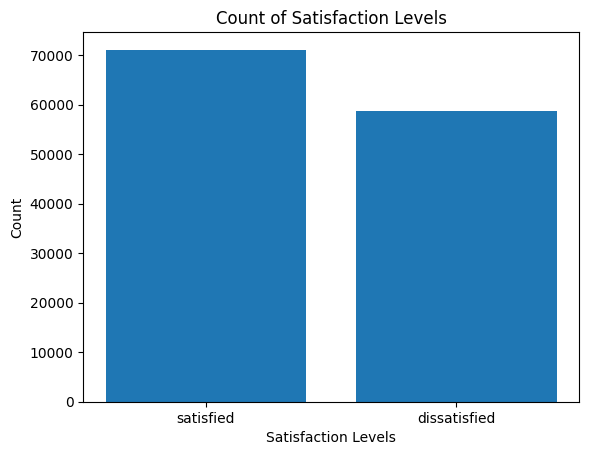

In [9]:
# Plotting the counts
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Satisfaction Levels')
plt.ylabel('Count')
plt.title('Count of Satisfaction Levels')
plt.show()

* **Checking for missing values**

In [10]:
df.isna().sum().sort_values(ascending=False)

Arrival Delay in Minutes             393
Customer Type                          0
Departure Delay in Minutes             0
Online boarding                        0
Cleanliness                            0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Ease of Online booking                 0
Online support                         0
satisfaction                           0
Inflight wifi service                  0
Gate location                          0
Food and drink                         0
Departure/Arrival time convenient      0
Seat comfort                           0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Inflight entertainment                 0
dtype: int64

In [11]:
df1 = df.dropna(axis=0).reset_index(drop = True)

In [12]:
df1['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df1[['satisfaction']]).toarray()

# **ON-BOARD SERVICE**

In [13]:
df1 = df1.astype({"On-board service": float})

In [14]:
df1.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3.0,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4.0,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3.0,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1.0,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2.0,0,2,4,2,5,0,0.0


* **Creating the training and testing data**

In [15]:
X = df1[["On-board service"]]
y = df1["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

* **Fitting the logistic model**

In [16]:
clf = LogisticRegression().fit(X_train,y_train)

* **Obtaining parameter estimates**

In [17]:
clf.coef_

array([[0.60626847]])

In [18]:
clf.intercept_

array([-1.89769772])

* **Plotting**

<Axes: xlabel='On-board service', ylabel='satisfaction'>

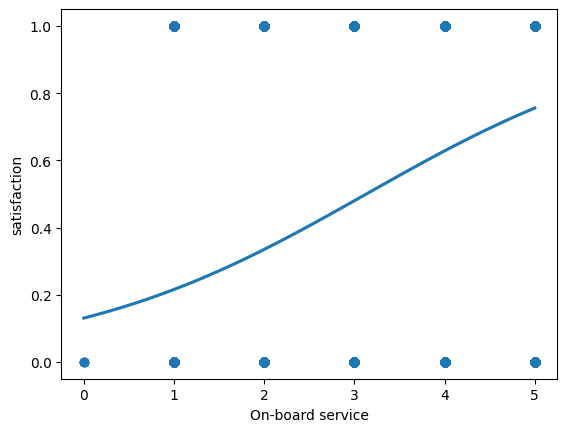

In [19]:
sns.regplot(x="On-board service", y="satisfaction", data=df1, logistic=True, ci=None)

* **Predicting the outcome**

In [20]:
y_pred = clf.predict(X_test)

In [21]:
print(y_pred)

[1. 0. 0. ... 1. 1. 1.]


In [22]:
clf.predict_proba(X_test)

array([[0.37112906, 0.62887094],
       [0.51971285, 0.48028715],
       [0.78438901, 0.21561099],
       ...,
       [0.37112906, 0.62887094],
       [0.37112906, 0.62887094],
       [0.37112906, 0.62887094]])

In [23]:
clf.predict(X_test)

array([1., 0., 0., ..., 1., 1., 1.])

* **Analyse the results**

In [24]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.672793
Precision: 0.695774
Recall: 0.711948
F1 Score: 0.703768


The model is 67.2 percent accurate


* **Confusion matrix**

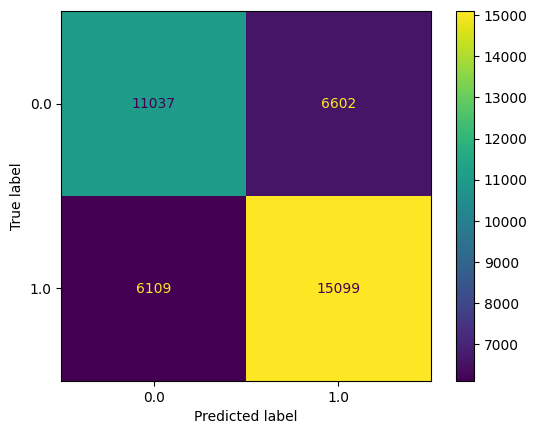

In [25]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()
plt.show()

# **Ease of Online booking**

In [26]:
df1 = df1.astype({"Ease of Online booking": float})

In [27]:
df1.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3.0,3.0,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3.0,4.0,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2.0,3.0,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1.0,1.0,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2.0,2.0,0,2,4,2,5,0,0.0


* **Creating training and testing data**

In [28]:
X = df1[["Ease of Online booking"]]
y = df1["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

* **Fitting a logistic model**

In [29]:
clf = LogisticRegression().fit(X_train,y_train)

* **Obtaining parameter estimates**

In [30]:
clf.coef_

array([[0.75734089]])

In [31]:
clf.intercept_

array([-2.42729294])

* **Plotting**

<Axes: xlabel='Ease of Online booking', ylabel='satisfaction'>

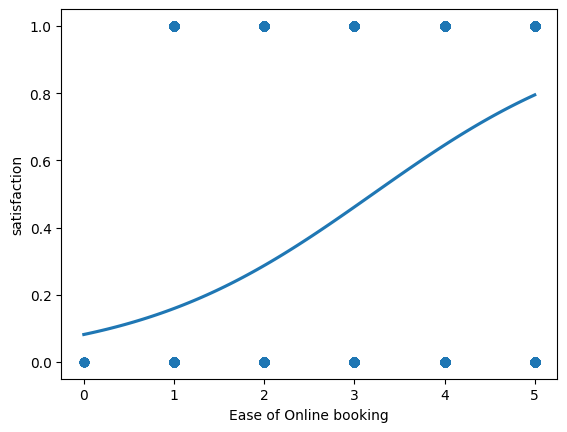

In [32]:
sns.regplot(x="Ease of Online booking", y="satisfaction", data=df1, logistic=True, ci=None)

* **Predicting the outcome**

In [33]:
y_pred = clf.predict(X_test)

In [34]:
print(y_pred)

[1. 1. 0. ... 0. 1. 1.]


In [35]:
clf.predict_proba(X_test)

array([[0.35387011, 0.64612989],
       [0.20433596, 0.79566404],
       [0.71353419, 0.28646581],
       ...,
       [0.84156943, 0.15843057],
       [0.20433596, 0.79566404],
       [0.35387011, 0.64612989]])

In [36]:
clf.predict(X_test)

array([1., 1., 0., ..., 0., 1., 1.])

* **Analyse the results**

In [37]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.725384
Precision: 0.738138
Recall: 0.770228
F1 Score: 0.753842


The model is 72.5 percent accurate

* **Confusion matrix**

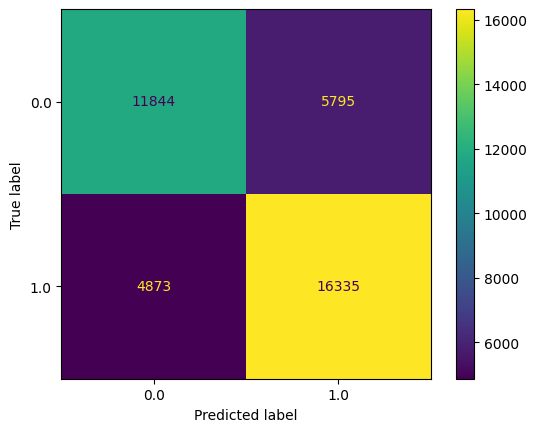

In [38]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()
plt.show()

# Checkin service

In [39]:
df1 = df1.astype({"Checkin service": float})

In [40]:
df1.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3.0,3.0,0,3,5.0,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3.0,4.0,4,4,2.0,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2.0,3.0,3,4,4.0,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1.0,1.0,0,1,4.0,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2.0,2.0,0,2,4.0,2,5,0,0.0


* **Creating the training and testing data**

In [41]:
X = df1[["Checkin service"]]
y = df1["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

* **Fitting a logistic model**

In [42]:
clf = LogisticRegression().fit(X_train,y_train)

* **Obtaining parameter estimates**

In [43]:
clf.coef_

array([[0.44932605]])

In [44]:
clf.intercept_

array([-1.29868025])

* **Plotting**

<Axes: xlabel='Checkin service', ylabel='satisfaction'>

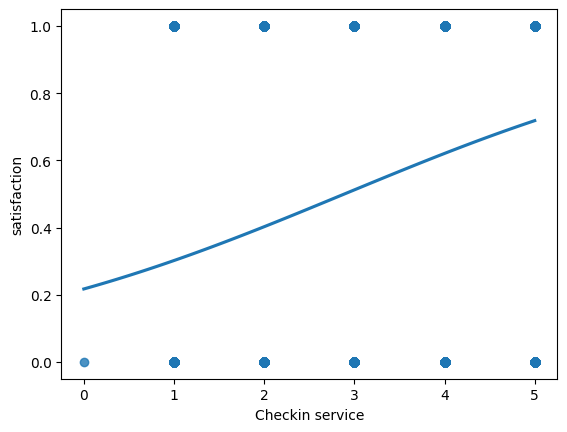

In [45]:
sns.regplot(x="Checkin service", y="satisfaction", data=df1, logistic=True, ci=None)

* **Predicting the outcomme**

In [46]:
y_pred = clf.predict(X_test)

In [47]:
print(y_pred)

[1. 1. 0. ... 1. 1. 1.]


In [48]:
clf.predict_proba(X_test)

array([[0.27929728, 0.72070272],
       [0.3778641 , 0.6221359 ],
       [0.70043165, 0.29956835],
       ...,
       [0.48767802, 0.51232198],
       [0.48767802, 0.51232198],
       [0.3778641 , 0.6221359 ]])

In [49]:
clf.predict(X_test)

array([1., 1., 0., ..., 1., 1., 1.])

* **Analyse the results**

In [50]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.627204
Precision: 0.613561
Recall: 0.856752
F1 Score: 0.715045


The model is 62.7 percent accurate

* **Confusion matrix**

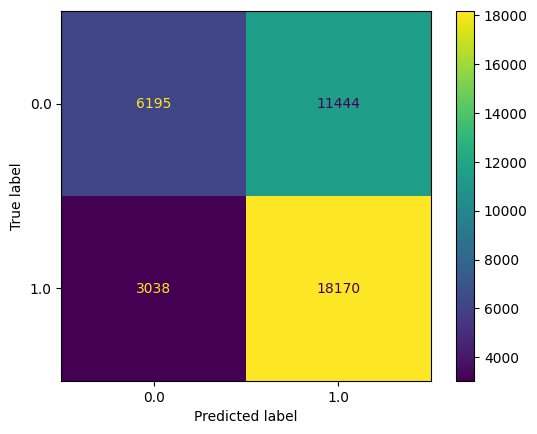

In [51]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()
plt.show()